In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('talk')

In [109]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
titanic.columns = titanic.columns.str.lower()

In [111]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [112]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
passengerid,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [113]:
titanic[titanic.duplicated('passengerid')]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked


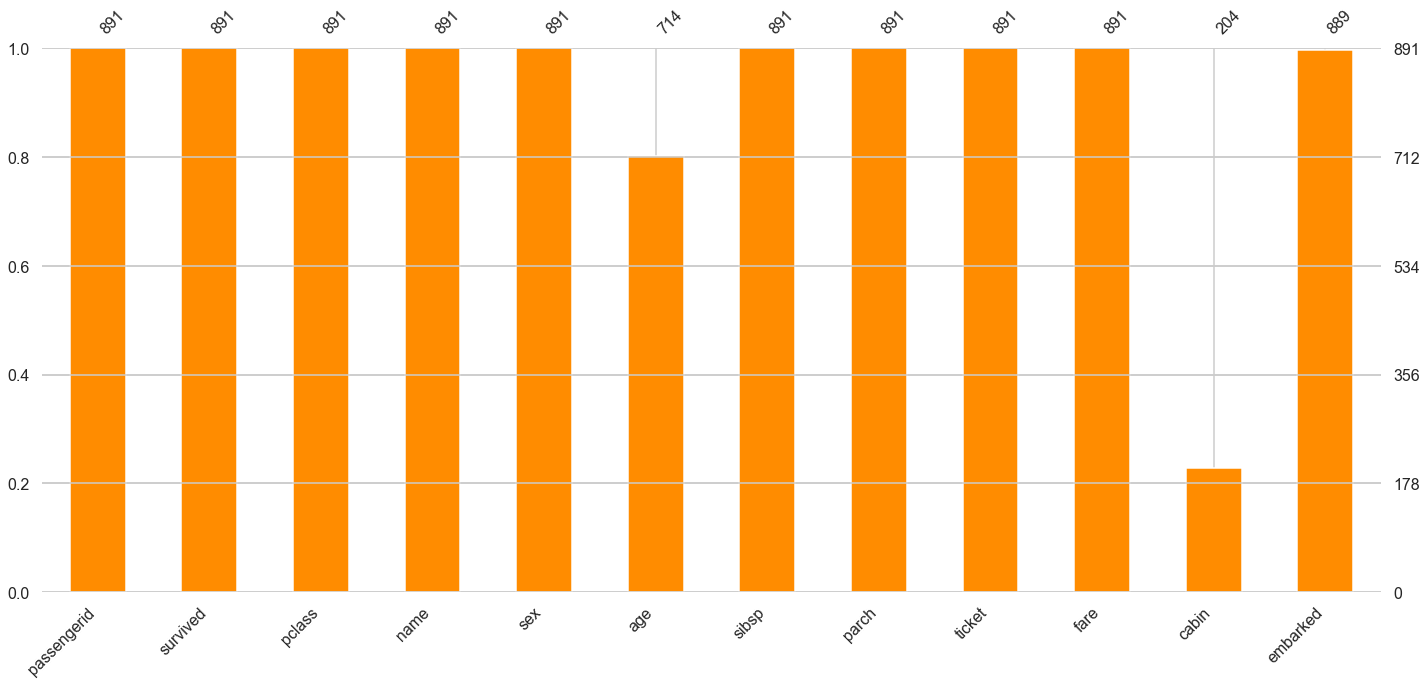

In [114]:
import missingno as msno 

msno.bar(titanic, color='darkorange')

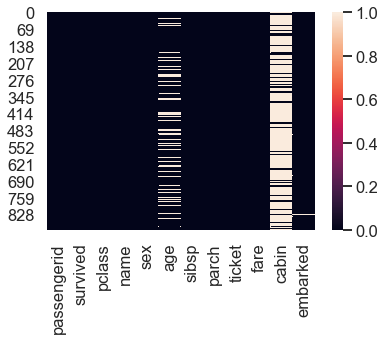

In [115]:
sns.heatmap(titanic.isnull())

In [116]:
titanic.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [117]:
titanic.groupby(['pclass', 'sex'])['age'].median()

pclass  sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: age, dtype: float64

In [118]:
titanic['age'] = titanic.groupby(['pclass', 'sex'])['age'].apply(lambda x: x.fillna(x.median()))

In [119]:
titanic.embarked.fillna('S', inplace=True)

In [120]:
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [122]:
le = LabelEncoder()
titanic['label_encoder'] = le.fit_transform(titanic.pclass)

In [123]:
encoder = OneHotEncoder()
az = encoder.fit_transform(titanic.label_encoder.values.reshape(-1,1)).toarray()
onehot = pd.DataFrame(az)
df = pd.concat([titanic, onehot], axis=1)
df.rename(columns={0: 'pclass_1', 1: 'pclass_2', 2: 'pclass_3'}, inplace=True)
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,label_encoder,pclass_1,pclass_2,pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,0.0,0.0,1.0


In [124]:
from category_encoders import TargetEncoder

In [125]:
tencoder = TargetEncoder()
df['embarked_prob_survived'] = tencoder.fit_transform(df.embarked, df.survived)
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,label_encoder,pclass_1,pclass_2,pclass_3,embarked_prob_survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0.0,0.0,1.0,0.339009
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1.0,0.0,0.0,0.553571
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0.0,0.0,1.0,0.339009
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1.0,0.0,0.0,0.339009
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,0.0,0.0,1.0,0.339009


In [130]:
df.groupby(['embarked','survived'])['survived'].count()

embarked  survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
Name: survived, dtype: int64

In [131]:
dummy = pd.concat([pd.get_dummies(df.sex), pd.get_dummies(df.embarked)], axis=1)
data = pd.concat([df, dummy], axis=1)
data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,...,label_encoder,pclass_1,pclass_2,pclass_3,embarked_prob_survived,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,2,0.0,0.0,1.0,0.339009,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1.0,0.0,0.0,0.553571,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,2,0.0,0.0,1.0,0.339009,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1.0,0.0,0.0,0.339009,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,2,0.0,0.0,1.0,0.339009,0,1,0,0,1


In [132]:
clean_data = data.drop(['passengerid', 'pclass','name', 'sex', 'ticket',
                        'cabin', 'embarked', 'female'], axis=1)
clean_data.head()

,survived,age,sibsp,parch,fare,label_encoder,pclass_1,pclass_2,pclass_3,embarked_prob_survived,male,C,Q,S
0,0,22.0,1,0,7.2500,2,0.0,0.0,1.0,0.339009,1,0,0,1
1,1,38.0,1,0,71.2833,0,1.0,0.0,0.0,0.553571,0,1,0,0
2,1,26.0,0,0,7.9250,2,0.0,0.0,1.0,0.339009,0,0,0,1
3,1,35.0,1,0,53.1000,0,1.0,0.0,0.0,0.339009,0,0,0,1
4,0,35.0,0,0,8.0500,2,0.0,0.0,1.0,0.339009,1,0,0,1


In [133]:
abs(clean_data.corr()['survived']).drop('survived').sort_values(ascending=False)

male                      0.543351
label_encoder             0.338481
pclass_3                  0.322308
pclass_1                  0.285904
fare                      0.257307
embarked_prob_survived    0.170707
C                         0.168240
S                         0.149683
pclass_2                  0.093349
parch                     0.081629
age                       0.059579
sibsp                     0.035322
Q                         0.003650
Name: survived, dtype: float64

In [53]:
import statsmodels.api as sm

In [54]:
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        
        r_squared = sm.OLS(y,x).fit().rsquared
        
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

In [139]:
clean_data.head()

,survived,age,sibsp,parch,fare,label_encoder,pclass_1,pclass_2,pclass_3,embarked_prob_survived,male,C,Q,S
0,0,22.0,1,0,7.2500,2,0.0,0.0,1.0,0.339009,1,0,0,1
1,1,38.0,1,0,71.2833,0,1.0,0.0,0.0,0.553571,0,1,0,0
2,1,26.0,0,0,7.9250,2,0.0,0.0,1.0,0.339009,0,0,0,1
3,1,35.0,1,0,53.1000,0,1.0,0.0,0.0,0.339009,0,0,0,1
4,0,35.0,0,0,8.0500,2,0.0,0.0,1.0,0.339009,1,0,0,1


In [140]:
calculate_vif(clean_data)

<ipython-input-54-2f273682d8e6>:10: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1/(1-r_squared),2)


,Var,Vif
5,label_encoder,inf
6,pclass_1,inf
7,pclass_2,inf
8,pclass_3,inf
9,embarked_prob_survived,inf
11,C,inf
12,Q,inf
13,S,inf
4,fare,1.77
0,survived,1.67


In [134]:
data = clean_data.copy()
data.head()

,survived,age,sibsp,parch,fare,label_encoder,pclass_1,pclass_2,pclass_3,embarked_prob_survived,male,C,Q,S
0,0,22.0,1,0,7.2500,2,0.0,0.0,1.0,0.339009,1,0,0,1
1,1,38.0,1,0,71.2833,0,1.0,0.0,0.0,0.553571,0,1,0,0
2,1,26.0,0,0,7.9250,2,0.0,0.0,1.0,0.339009,0,0,0,1
3,1,35.0,1,0,53.1000,0,1.0,0.0,0.0,0.339009,0,0,0,1
4,0,35.0,0,0,8.0500,2,0.0,0.0,1.0,0.339009,1,0,0,1


## Distribution Comparison using quantiletransformer

In [171]:
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import skew

In [244]:
qt = QuantileTransformer(n_quantiles=10, random_state=1, output_distribution='normal')
cols = data.columns
a = qt.fit_transform(data)

In [246]:
b = pd.DataFrame(a, columns=cols)
b.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,-1.207927,5.059917,-5.199338,-5.199338,-5.199338,5.199338,5.199338
age,891.0,-0.040367,0.978990,-5.199338,-0.703922,-0.046436,0.626870,5.199338
sibsp,891.0,-3.173504,2.994977,-5.199338,-5.199338,-5.199338,0.967422,5.199338
parch,891.0,-3.674103,2.728669,-5.199338,-5.199338,-5.199338,-5.199338,5.199338
fare,891.0,-0.075217,1.101620,-5.199338,-0.757643,-0.029798,0.605698,5.199338
label_encoder,891.0,1.546453,4.369998,-5.199338,-0.282216,5.199338,5.199338,5.199338
pclass_1,891.0,-2.678447,4.458851,-5.199338,-5.199338,-5.199338,-5.199338,5.199338
pclass_2,891.0,-3.051912,4.211752,-5.199338,-5.199338,-5.199338,-5.199338,5.199338
pclass_3,891.0,0.531021,5.175054,-5.199338,-5.199338,5.199338,5.199338,5.199338
embarked_prob_survived,891.0,-2.723233,4.165445,-5.199338,-5.199338,-5.199338,0.764710,5.199338


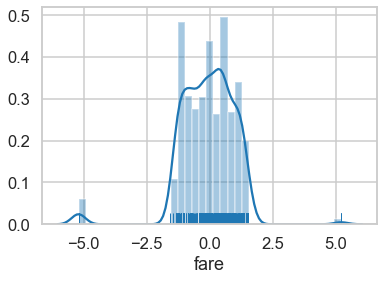

In [247]:
sns.distplot(b.fare, rug=True)

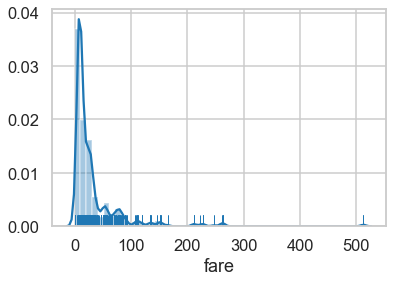

In [248]:
sns.distplot(data.fare, rug=True)

In [249]:
b_skew = skew(b.fare)
data_skew = skew(data.fare)

print(f'Data without Qtransformer: {data_skew} ')
print(f'Data with Qtransformer: {b_skew}')

Data without Qtransformer: 4.7792532923723545 
Data with Qtransformer: -1.2106468448781744


In [250]:
c = b.copy()
c.head()

,survived,age,sibsp,parch,fare,label_encoder,pclass_1,pclass_2,pclass_3,embarked_prob_survived,male,C,Q,S
0,-5.199338,-0.645631,0.967422,-5.199338,-1.258125,5.199338,-5.199338,-5.199338,5.199338,-5.199338,5.199338,-5.199338,-5.199338,5.199338
1,5.199338,0.750299,0.967422,-5.199338,1.187440,-5.199338,5.199338,-5.199338,-5.199338,5.199338,-5.199338,5.199338,-5.199338,-5.199338
2,5.199338,-0.046436,-5.199338,-5.199338,-0.750576,5.199338,-5.199338,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,5.199338
3,5.199338,0.568671,0.967422,-5.199338,0.953549,-5.199338,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,5.199338
4,-5.199338,0.568671,-5.199338,-5.199338,-0.691680,5.199338,-5.199338,-5.199338,5.199338,-5.199338,5.199338,-5.199338,-5.199338,5.199338


In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer

In [260]:
X = c.drop(['survived', 'pclass_2', 'label_encoder', 'Q'], axis=1)
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

steps = [('logreg', LogisticRegression())]

pipe = Pipeline(steps)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
pipe.score(X_test, y_test)

0.7847533632286996

In [261]:
cv = cross_val_score(pipe, X, y, cv=10)
cv.mean()

0.8002247191011236

In [258]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report)
report_df.T

,precision,recall,f1-score,support
0,0.773973,0.882812,0.824818,128.000000
1,0.805195,0.652632,0.720930,95.000000
accuracy,0.784753,0.784753,0.784753,0.784753
macro avg,0.789584,0.767722,0.772874,223.000000
weighted avg,0.787274,0.784753,0.780561,223.000000


In [254]:
prob = pipe.predict_proba(X_test)[:, 1]

fpr, tpr, threshold = roc_curve(y_test, prob)

roc_auc = auc(fpr, tpr)

<function matplotlib.pyplot.show(*args, **kw)>

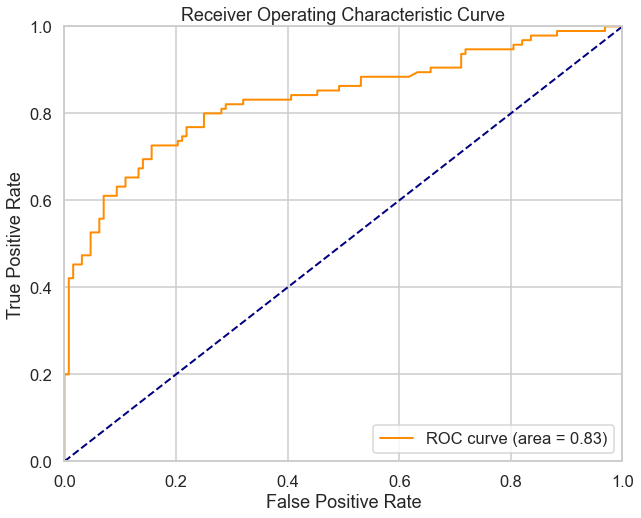

In [255]:
plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
sns.set_context('talk')

plt.plot(fpr, tpr, color='darkorange', lw = 2, label='ROC curve (area = %.2f)' %roc_auc)
plt.plot([0,1], [0,1], color='navy', lw = 2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show